3.	Import the required packages with their customary aliases as follows:


In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')


5. How many rows and columns are in `gdp_df`? What are the data types of each column?
--There are 7176 rows and 4 columns



In [3]:
gdp_df.shape

(7176, 4)

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.


In [4]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis =1) 
gdp_df.rename(columns = {"Country or Area":"Country"}, inplace=True)
gdp_df.rename(columns = {"Value":"GDP_Per_Capita"}, inplace=True)
gdp_df.rename(columns = {"Year":"Year"}, inplace=True)
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2019     2065.036235
2     Afghanistan  2018     2033.804389
3     Afghanistan  2017     2058.400221
4     Afghanistan  2016     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1994     2603.927369
7172     Zimbabwe  1993     2420.092791
7173     Zimbabwe  1992     2437.152908
7174     Zimbabwe  1991     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 


In [5]:
gdp_df.Country.value_counts().index.tolist()

['Least developed countries: UN classification',
 'Niger',
 'Middle East & North Africa (IDA & IBRD)',
 'Middle income',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Nigeria',
 'Kenya',
 'North America',
 'North Macedonia',
 'Norway',
 'OECD members',
 'Oman',
 'Pacific island small states',
 'Pakistan',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa',
 'Micronesia',
 'Mexico',
 'Korea',
 'Kyrgyz Republic',
 'Lao PDR',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean (IDA & IBRD)',
 'Africa Eastern and Southern',
 'Lebanon',
 'Lesotho',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Luxembourg',
 'Macao SAR, China',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Malta',
 'Marshall Islands',
 'Mauritania',
 'M

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


<Axes: title={'center': 'False'}>

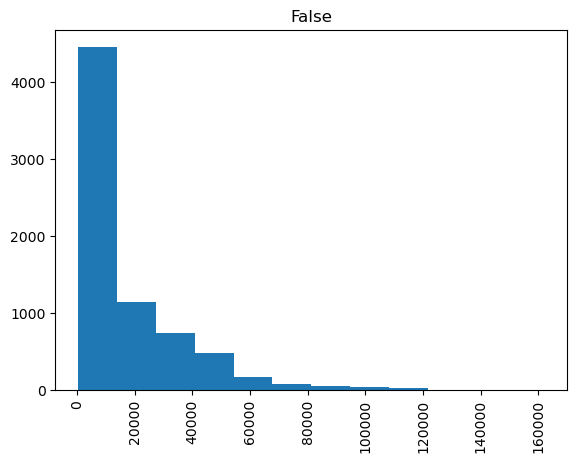

In [6]:
twen = gdp_df['Year'] == '2020'
gdp_df.hist(column = 'GDP_Per_Capita',by = twen, bins=12)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

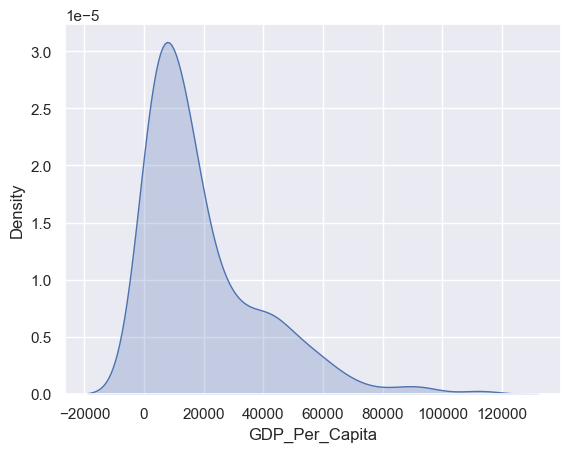

In [7]:
gdp_subset = gdp_df[gdp_df['Year'] == 2020]
sns.set(style = "darkgrid")
sns.kdeplot((gdp_subset['GDP_Per_Capita']), fill=True)

<Axes: xlabel='GDP_Per_Capita'>

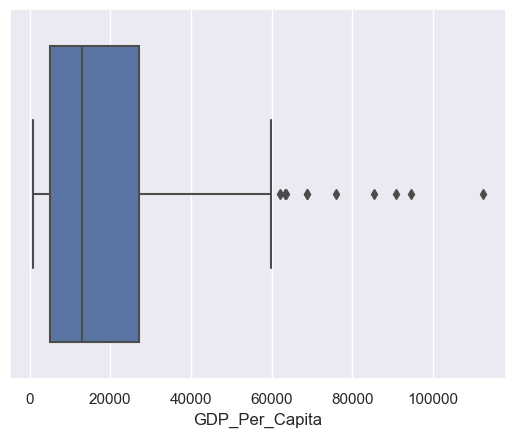

In [8]:
gdp_subset = gdp_df[gdp_df['Year'] == 2020]
sns.boxplot(data = gdp_subset, x="GDP_Per_Capita")

<Axes: xlabel='GDP_Per_Capita'>

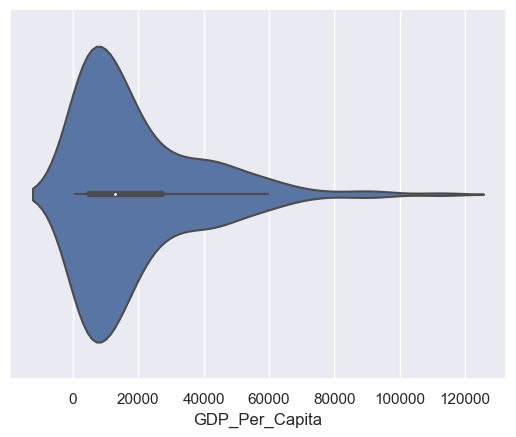

In [9]:
gdp_subset = gdp_df[gdp_df['Year'] == 2020]
sns.violinplot(x=gdp_subset["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

In [10]:
gdp_subset = gdp_df[gdp_df['Year'] == 2020]
gdp_subset['GDP_Per_Capita'].median()

12908.9374056206

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

<Axes: xlabel='GDP_Per_Capita'>

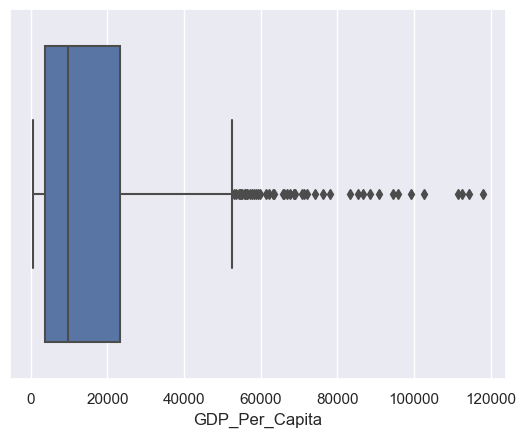

In [11]:
gdp_decades =gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.boxplot(data = gdp_decades, x="GDP_Per_Capita")




<BarContainer object of 918 artists>

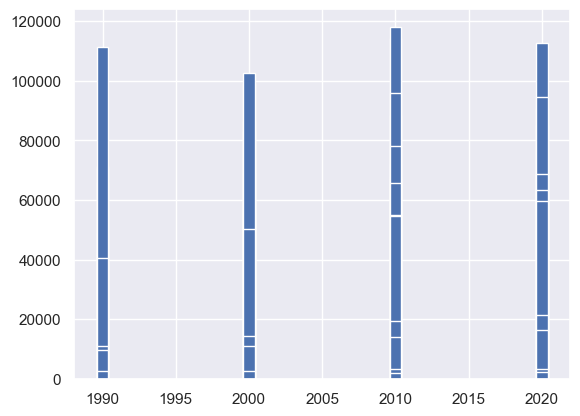

In [12]:
gdp_decades =gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
plt.bar(gdp_decades.Year, gdp_decades.GDP_Per_Capita)

<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

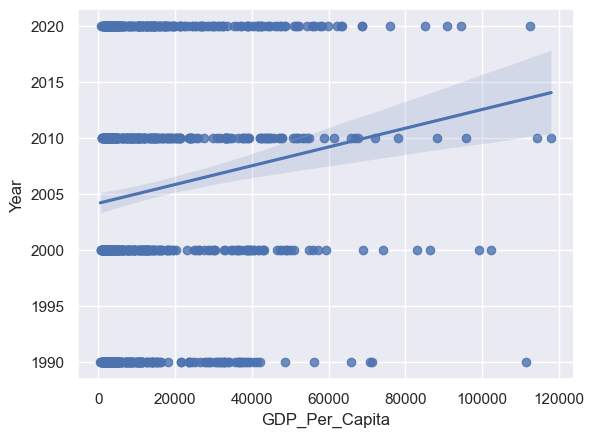

In [13]:
gdp_decades =gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.regplot(x=gdp_decades["GDP_Per_Capita"], y=gdp_decades["Year"])

<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

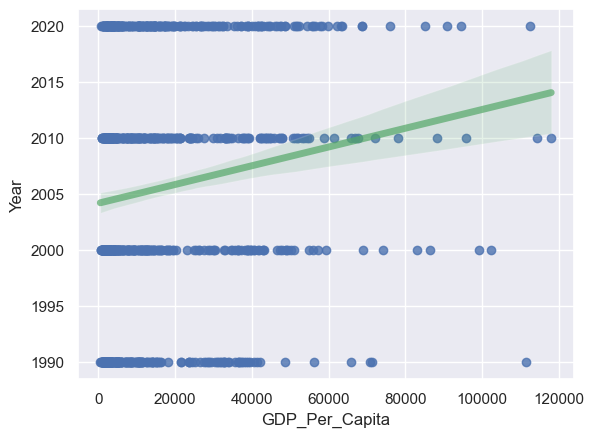

In [14]:
gdp_decades =gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.regplot(x=gdp_decades["GDP_Per_Capita"], y=gdp_decades["Year"], line_kws={"color":"g","alpha":0.7,"lw":5})

11. Which country was the first to have a GDP per capita greater than $100,000?

In [15]:
gdp_100  = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
print(gdp_100)

                   Country  Year  GDP_Per_Capita
3882            Luxembourg  2020   112557.309472
3883            Luxembourg  2019   116518.276815
3884            Luxembourg  2018   115049.926079
3885            Luxembourg  2017   114985.842236
3886            Luxembourg  2016   116283.699681
3887            Luxembourg  2015   113182.728563
3888            Luxembourg  2014   113313.578898
3889            Luxembourg  2013   113050.663254
3890            Luxembourg  2012   112137.135491
3891            Luxembourg  2011   112998.390477
3892            Luxembourg  2010   114343.988089
3893            Luxembourg  2009   112230.081410
3894            Luxembourg  2008   118154.667184
3895            Luxembourg  2007   120647.822959
3896            Luxembourg  2006   113346.035782
3897            Luxembourg  2005   108632.360016
3898            Luxembourg  2004   107634.837198
3899            Luxembourg  2003   104743.000088
3900            Luxembourg  2002   103317.331098
3901            Luxe

The United Arab Emirates were the first to have a 'GDP_Per_Capita', having the first occurance in 1990.

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.



In [16]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
gdp_2020.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
5720,Singapore,2020,94505.636160
3071,Ireland,2020,90789.221024
5381,Qatar,2020,85290.450430
639,Bermuda,2020,76105.138057
...,...,...,...
4750,Niger,2020,1221.269930
5871,Somalia,2020,1180.965971
1524,Dem. Rep. Congo,2020,1082.445242
1136,Central African Republic,2020,937.856470


Luxembourg had the highest gdp per capita. 

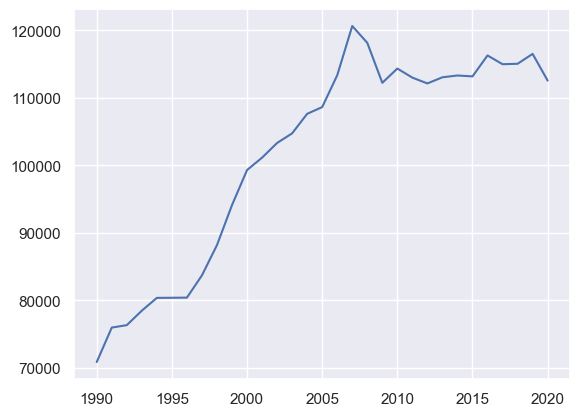

In [17]:
lux = gdp_df.loc[gdp_df['Country']== 'Luxembourg']
plt.plot(lux.Year, lux.GDP_Per_Capita)

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


In [18]:
gdp_20 = gdp_df[gdp_df['Year'] == 2020]
gdp_20.sort_values('GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
1136,Central African Republic,2020,937.856470
1524,Dem. Rep. Congo,2020,1082.445242
5871,Somalia,2020,1180.965971
4750,Niger,2020,1221.269930
...,...,...,...
639,Bermuda,2020,76105.138057
5381,Qatar,2020,85290.450430
3071,Ireland,2020,90789.221024
5720,Singapore,2020,94505.636160


Burundi had the lowest GDP per capita in 2020.

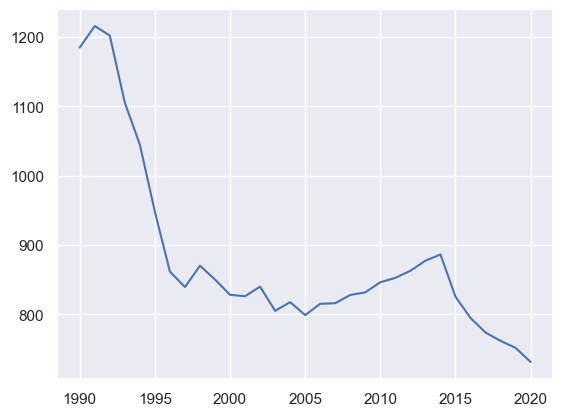

In [19]:
bur = gdp_df.loc[gdp_df['Country']== 'Burundi']
plt.plot(bur.Year, bur.GDP_Per_Capita)

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [20]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)
# print(internet_df)
print(internet_df.head())
print(internet_df.tail())

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area  Year     Value  Value Footnotes
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'


In [21]:
internet_df = internet_df.drop(['Value Footnotes'], axis =1) 
internet_df.rename(columns = {"Country or Area":"Country"}, inplace=True)
internet_df.rename(columns = {"Value":"Internet_Users_Pct"}, inplace=True)
internet_df.rename(columns = {"Year":"Year"}, inplace=True)
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]


16. Look at the number of observations in this dataset per year. What do you notice?


In [22]:
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]


This dataset only goes to the year 2014.


17. What is the first year to have a non-zero internet users percentage value?


In [23]:
int_1 = internet_df[internet_df['Internet_Users_Pct'] >0]
int_1.sort_values('Year', ascending = True)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


1990 was the first year to have a non-zero internet users value.

18. How does the distribution of internet users percent differ for 2000 and 2014?


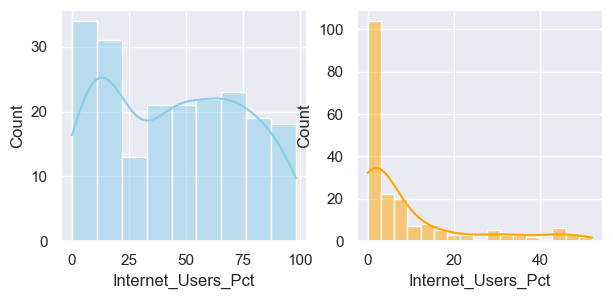

In [24]:
df_00 = internet_df[internet_df['Year']== 2000]
df_14 = internet_df[internet_df['Year']== 2014]
sns.set(style="darkgrid")
fig, axs = plt.subplots(1,2, figsize=(7, 3))
sns.histplot(data=df_00, x="Internet_Users_Pct", kde=True, color="orange", ax=axs[1])
sns.histplot(data=df_14, x="Internet_Users_Pct", kde=True, color="skyblue", ax=axs[0])
plt.show()

The year 2014 has a far more consistent User Percent than the year 2000.


19. For how many countries was the percentage of internet users below 5% in 2014?


In [25]:
df_14 = internet_df[internet_df['Year']== 2014]
df_p = df_14[df_14['Internet_Users_Pct']< .050000]
print(df_p)

                          Country  Year  Internet_Users_Pct
1065  Dem. People's Rep. of Korea  2014                 0.0


Just one country had a percentage of internet users below 5%:North Korea.

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [26]:
 gdp_and_internet_use = gdp_df.merge(internet_df, 'outer')

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2803  Iceland  2014    50450.741612               98.16
645   Bermuda  2014    77361.104881               96.80
4880   Norway  2014    62390.130313               96.30


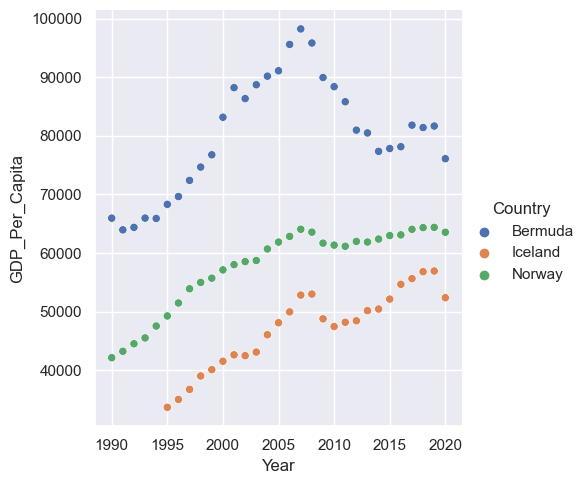

In [49]:
gdp_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']== 2014]
gdp_er = gdp_2014.sort_values('Internet_Users_Pct', ascending = False)
print(gdp_er.head(3))
gdp_all = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland', 'Bermuda', 'Norway'])]

sns.relplot(data=gdp_all , x='Year', y='GDP_Per_Capita', hue='Country')

# internet_use = sns.gdp_2014("Internet_Users_Pct")
# sns.FacetGrid(internet_use)
# sns.FacetGrid(internet_use, col="Country", row="Internet_Users_Pct")

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [28]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']== 2014]

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

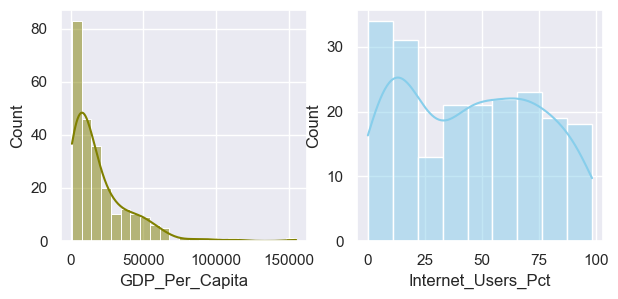

In [29]:
gdp_and_internet_use_2014
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(7, 3))

sns.histplot(data=gdp_and_internet_use_2014, x="Internet_Users_Pct", kde=True, color="skyblue", ax=axs[1])
sns.histplot(data=gdp_and_internet_use_2014, x="GDP_Per_Capita", kde=True, color="olive", ax=axs[0])

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


In [30]:
gdp_per_capita_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']== 2014]
GDP_group = pd.qcut(gdp_per_capita_2014.GDP_Per_Capita, q=3, labels=["Low", "Medium", "High"])
gdp_new = gdp_per_capita_2014.insert(loc=2 ,column='GDP_group', value = GDP_group)
print(gdp_per_capita_2014)

                          Country  Year GDP_group  GDP_Per_Capita  \
6                     Afghanistan  2014       Low     2102.384604   
25    Africa Eastern and Southern  2014       Low     3677.319414   
56     Africa Western and Central  2014       Low     4215.646000   
87                        Albania  2014    Medium    11586.833878   
118                       Algeria  2014    Medium    11512.690472   
...                           ...   ...       ...             ...   
8147                       Turkey  2014       NaN             NaN   
8170                    Venezuela  2014       NaN             NaN   
8194                     Viet Nam  2014       NaN             NaN   
8214        Virgin Islands (U.S.)  2014       NaN             NaN   
8236                        Yemen  2014       NaN             NaN   

      Internet_Users_Pct  
6                   6.39  
25                   NaN  
56                   NaN  
87                 60.10  
118                18.09  
...      

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?


In [36]:
gdp_per_capita_2014.groupby('GDP_group', as_index=False)['Internet_Users_Pct'].median()


,GDP_group,Internet_Users_Pct
0,Low,10.60
1,Medium,43.00
2,High,78.74
